In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import gpfanova

In [59]:
# x = np.linspace(-1,1)[:,None]
# y = np.zeros((50,10))
# effect = np.array([[0]]*5+[[1]]*5)

# m = gpfanova.fanova.FANOVA(x,y,effect,y_sigma=-1)
# m.y,samples = m.samplePrior()

In [77]:
def setupSingleEffect(k=2,r=5,n=50,**kwargs):
    x = np.linspace(-1,1,n)[:,None]
    y = np.zeros((n,k*r))
    effect = np.array(range(k)*r)[:,None]

    m = gpfanova.fanova.FANOVA(x,y,effect,**kwargs)
    m.y,samples = m.samplePrior()
    
    return x,m.y,effect,samples,m

In [184]:
x,y,effect,samples,m = setupSingleEffect(2,2,10,y_sigma=-2)

In [185]:
m.parameter_cache['prior0_sigma'] = np.random.uniform(-2,2)
m.parameter_cache['prior0_lengthscale'] = np.random.uniform(-2,2)

m.parameter_cache['prior1_sigma'] = np.random.uniform(-2,2)
m.parameter_cache['prior1_lengthscale'] = np.random.uniform(-2,2)

In [186]:
m.parameter_cache['prior0_sigma'], m.parameter_cache['prior1_sigma']

(-0.7676066391588181, 1.9314633883849499)

In [187]:
m.parameter_cache['prior0_lengthscale'],m.parameter_cache['prior1_lengthscale']

(-1.6574867737636088, -1.6631046219130003)

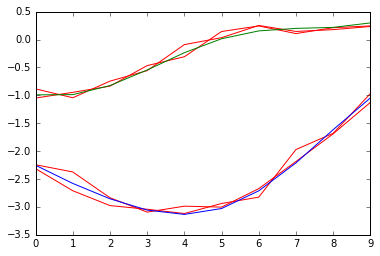

In [188]:
plt.plot(m.y,c='r');
plt.plot(samples[:,0]+samples[:,1]);
plt.plot(samples[:,0]-samples[:,1]);

In [189]:
m.sample(1)

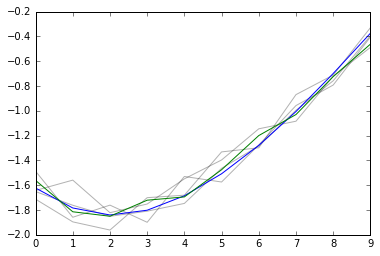

In [190]:
plt.plot(m.functionResidual(0).T,c='k',alpha=.3);
plt.plot(samples[:,0]);
plt.plot(m.functionMatrix()[:,0]);

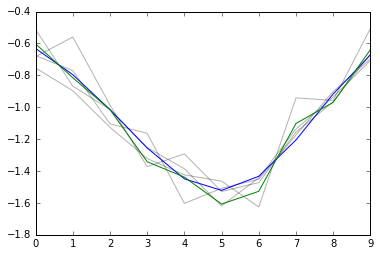

In [191]:
plt.plot(m.functionResidual(1).T,c='k',alpha=.3);
plt.plot(samples[:,1]);
plt.plot(m.functionMatrix()[:,1]);

In [192]:
# f = m.samplers[4]
# mu,cov = f._buildParameters()

# plt.plot(samples[:,1]);
# plt.plot(mu);

In [199]:
m.sample(4000,thin=10)

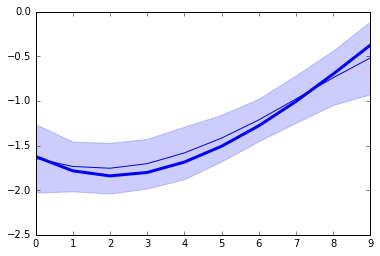

In [200]:
f = 0
# plt.plot(m.functionSamples(f).values.T,c='k',alpha=.1);
gpfanova.plot.plotFunctionSamples(m.functionSamples(f).values[50:,:],intervalKwargs={'tol':1})
plt.plot(samples[:,f],lw=3);

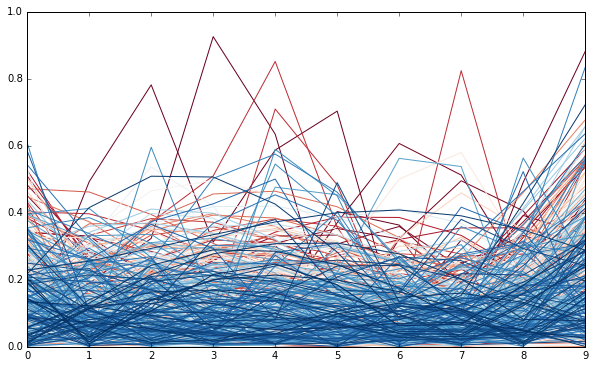

In [201]:
diff = m.functionSamples(f).values - samples[:,f]
cmap = plt.get_cmap("RdBu")

plt.figure(figsize=(10,6))
for i in range(diff.shape[0]):
    plt.plot(abs(diff[i,:]),c=cmap(1.*i/diff.shape[0]));

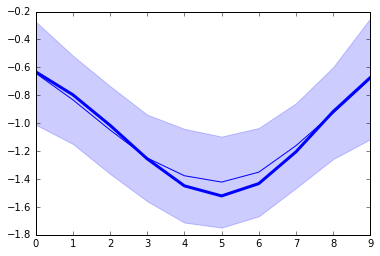

In [202]:
f = 1
# plt.plot(m.functionSamples(f).values.T,c='k',alpha=.1);
gpfanova.plot.plotFunctionSamples(m.functionSamples(f).values[50:,:],intervalKwargs={'tol':1})
plt.plot(samples[:,f],lw=3);

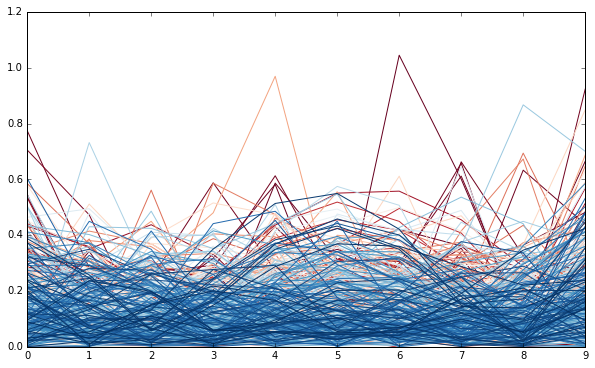

In [203]:
diff = m.functionSamples(f).values - samples[:,f]
cmap = plt.get_cmap("RdBu")

plt.figure(figsize=(10,6))
for i in range(diff.shape[0]):
    plt.plot(abs(diff[i,:]),c=cmap(1.*i/diff.shape[0]));

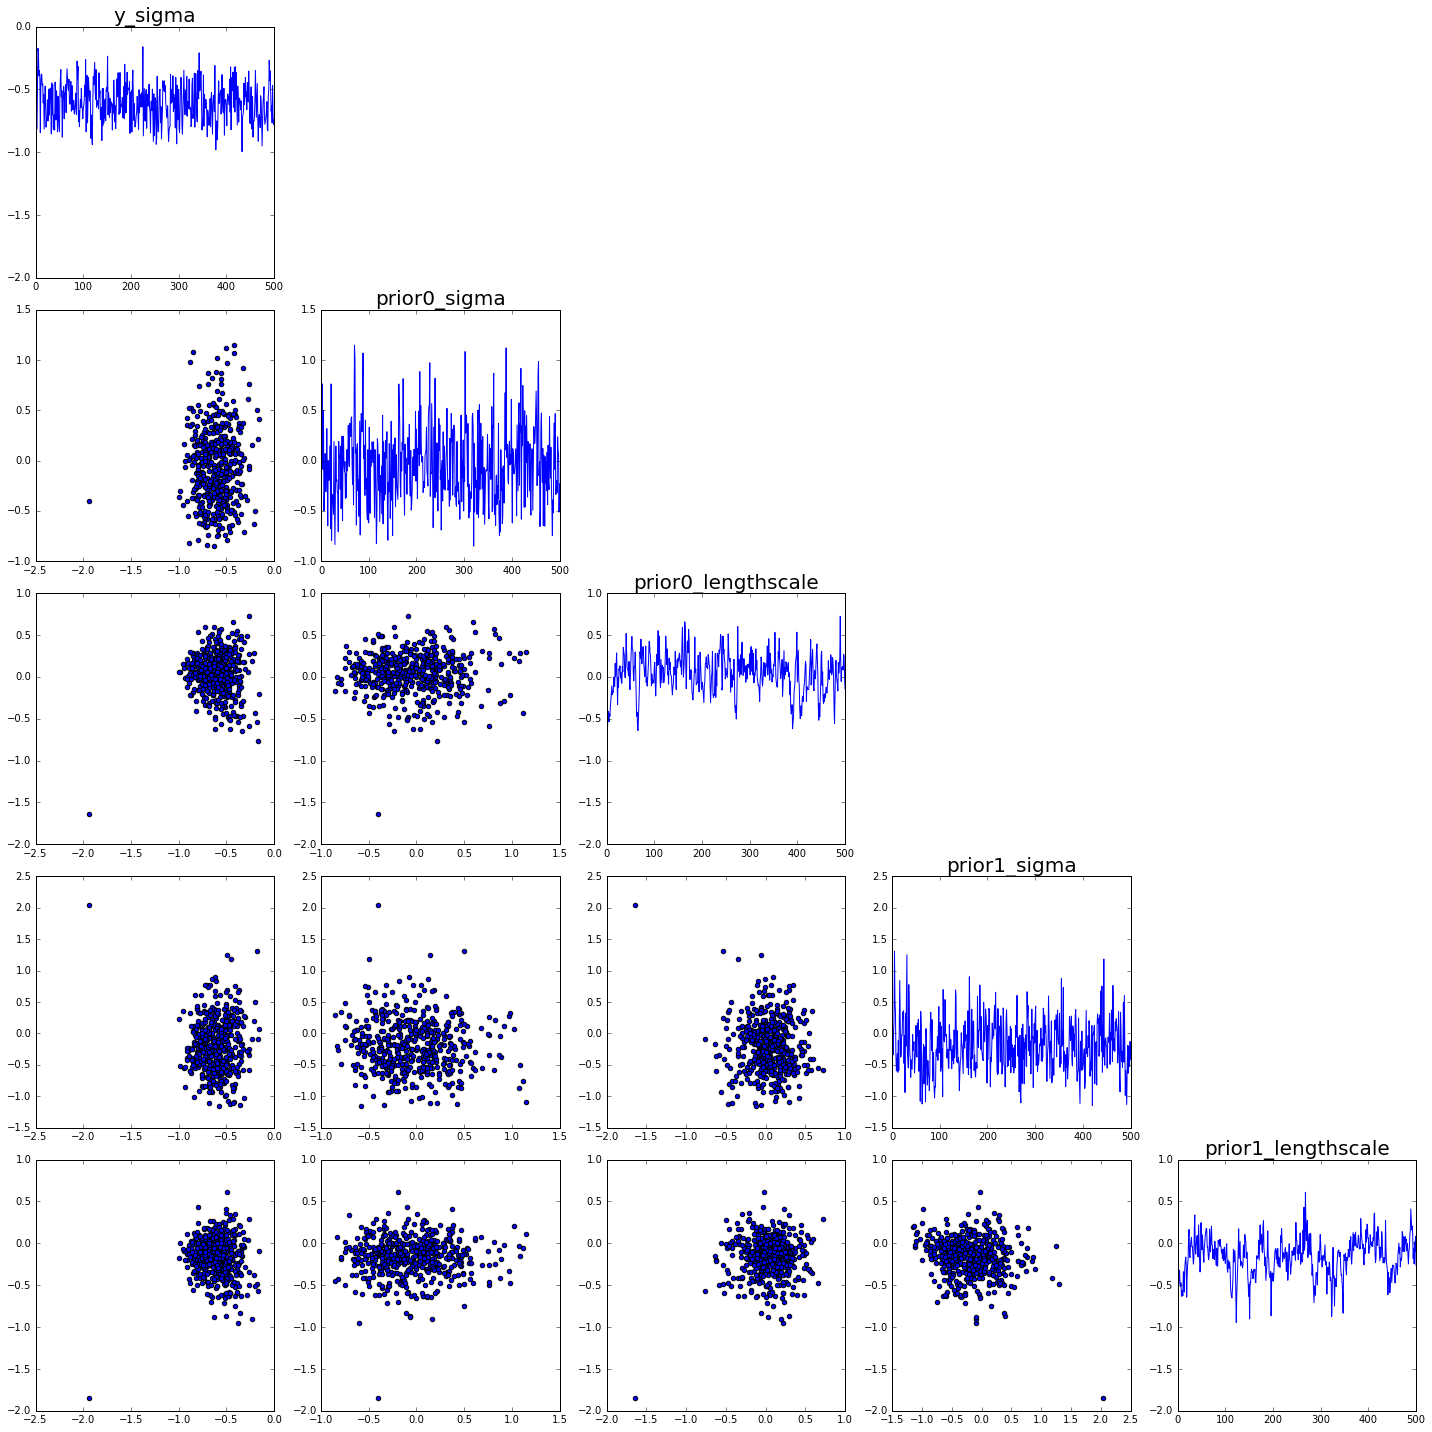

In [204]:
plt.figure(figsize=(20,20))
gpfanova.plot.plotHyperparameters(m,correlative=True)
plt.tight_layout()